In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [5]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [6]:
df[df.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [7]:
df[df.columns[2:]].iloc[6]

toxic            1
severe_toxic     1
obscene          1
threat           0
insult           1
identity_hate    0
Name: 6, dtype: int64

In [8]:
df[df['toxic']==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


In [9]:
df.iloc[6]['comment_text']

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [10]:
from tensorflow.keras.layers import TextVectorization

In [11]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [12]:
X.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [13]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [14]:
# Should be high but can't afford that much computation
MAX_FEATURES = 100000

In [15]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES, 
                              output_sequence_length = 1000, 
                              output_mode = 'int')

In [16]:
vectorizer.adapt(X.values)

In [17]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [18]:
#It had removed punctuation by default(standardize = 'lower_and_strip_punctuation')
TextVectorization??

In [19]:
#Example
vectorizer('life goes on and on')[:10]
#Five integers for five words 

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([306, 755,  16,   5,  16,   0,   0,   0,   0,   0], dtype=int64)>

In [20]:
#vectorizing all our comments i.e. X.values
vectorized_text = vectorizer(X.values)

In [21]:
vectorized_text

<tf.Tensor: shape=(159571, 1000), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [22]:
X.shape

(159571,)

In [31]:
ds = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
ds = ds.cache()
ds = ds.shuffle(160000)
ds = ds.batch(16)
ds = ds.prefetch(8)

In [32]:
# tf.data.Dataset.from_tensor_slices is used to get the slices of list or array. eg-
dataset = tf.data.Dataset.from_tensor_slices([[5, 10], [3, 6]]) 
  
for ele in dataset: 
    print(ele.numpy()) 

[ 5 10]
[3 6]


In [33]:
batch_X, batch_y = ds.as_numpy_iterator().next()

In [34]:
batch_X.shape

(16, 1000)

In [35]:
batch_y.shape

(16, 6)

In [36]:
len(ds)

9974

In [37]:
# training data = 70%, validating_data = 20%, testing_data = 10%, 
len(ds)*.7

6981.799999999999

In [38]:
int(len(ds)*.7)

6981

In [39]:
train = ds.take(int(len(ds)*.7)) # taking 70% data from dataset
valid = ds.skip(int(len(ds)*.7)).take(int(len(ds)*.2)) #skipping first 70% training data then taking next 20% data as valid
test = ds.skip(int(len(ds)*.9)).take(int(len(ds)*.1)) 
#skipping first 90% training & valid data then taking next 10% data as test data

In [40]:
len(train)

6981

In [41]:
len(valid)

1994

In [42]:
len(test)

997

In [43]:
train_generator = ds.as_numpy_iterator()

In [44]:
train_generator.next()

(array([[   94,     3,     7, ...,     0,     0,     0],
        [   23,     7,  1291, ...,     0,     0,     0],
        [98594,   125,    33, ...,     0,     0,     0],
        ...,
        [44602,  1337,     8, ...,     0,     0,     0],
        [   46,    33,    15, ...,     0,     0,     0],
        [  346,     9,    15, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense,Embedding

In [47]:
Bidirectional??

In [50]:
model = Sequential()
model.add(Embedding(MAX_FEATURES+1,32))
model.add(Bidirectional(LSTM(32,activation='tanh'))) #Bidirectional LSTM layer
#gpu acceleration required for lstm needs tanh (so don't use relu) (but I don't have GPU :( )

#Feature Extractors
model.add(Dense(128, activation='ReLU'))
model.add(Dense(256, activation='ReLU'))
model.add(Dense(128, activation='ReLU'))
#Output Layer
model.add(Dense(6,activation='sigmoid'))

In [51]:
model.compile(loss='BinaryCrossentropy', optimizer = 'Adam')
#Any of the value can be 1(or 0) so we use binary crossentropy not categoricalentropy,
#it's not that ther could only be one category histor

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          3200032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                      

In [53]:
history = model.fit(train, epochs = 1, validation_data = valid)

6981/6981 [==============================] - 4608s 658ms/step - loss: 0.0622 - val_loss: 0.0510


In [55]:
import matplotlib.pyplot as plt

In [56]:
history.history

{'loss': [0.06219165027141571], 'val_loss': [0.051027990877628326]}

<Figure size 1000x500 with 0 Axes>

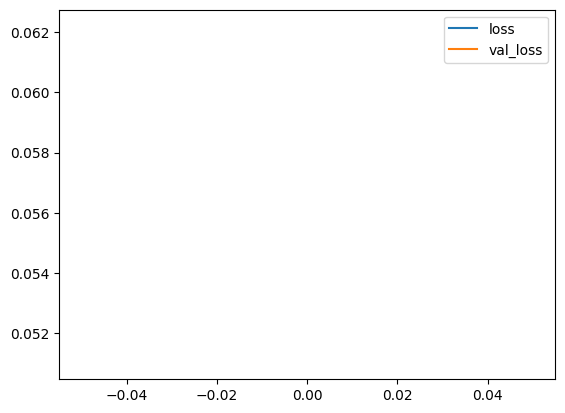

In [57]:
plt.figure(figsize=(10,5))
pd.DataFrame(history.history).plot()
plt.show()

In [58]:
input_text = vectorizer('Fuck off')

In [59]:
input_text

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([139, 224,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 

In [60]:
np.array([input_text]) # as the predict method expects input in batch

array([[139, 224,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [61]:
# we can also use expand_dims just to make code cleaner(though I don't get how >< )
np.expand_dims(input_text,0) 

array([[139, 224,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [62]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 809ms/step


array([[0.9908388 , 0.06009268, 0.860789  , 0.02098953, 0.67089254,
        0.07587638]], dtype=float32)

In [63]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [64]:
pred = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 44ms/step


In [67]:
pred

array([[0.9908388 , 0.06009268, 0.860789  , 0.02098953, 0.67089254,
        0.07587638]], dtype=float32)

In [65]:
#making predictions for test batch
test.as_numpy_iterator().next()

(array([[  253,    22,     6, ...,     0,     0,     0],
        [66900,   537,    58, ...,     0,     0,     0],
        [    1,   175,    36, ...,     0,     0,     0],
        ...,
        [ 2142,  1269,   865, ...,     0,     0,     0],
        [  517,   485,   278, ...,     0,     0,     0],
        [  425,     7, 10650, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0]], dtype=int64))

In [66]:
batch = test.as_numpy_iterator().next()
batch

(array([[  49,  234,  275, ...,    0,    0,    0],
        [ 128, 2455,  106, ...,    0,    0,    0],
        [  38,  940, 9349, ...,    0,    0,    0],
        ...,
        [ 165, 1030,   12, ...,    0,    0,    0],
        [ 171,  171,  124, ...,    0,    0,    0],
        [  76,  393,   14, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [68]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [69]:
model.predict(batch_X)

1/1 [==============================] - 0s 126ms/step


array([[3.89761175e-03, 2.13885443e-09, 3.21854568e-05, 1.91757772e-06,
        1.58216972e-05, 7.80691043e-05],
       [1.85934640e-02, 7.80984593e-08, 2.34617168e-04, 2.00256873e-05,
        1.63703837e-04, 3.77689983e-04],
       [9.30420961e-03, 1.43886574e-08, 9.07052090e-05, 6.37448738e-06,
        5.61360175e-05, 1.68390674e-04],
       [1.64530575e-01, 5.13874002e-05, 8.13609175e-03, 1.52805750e-03,
        8.53824895e-03, 7.04457751e-03],
       [6.72102440e-03, 5.90790927e-09, 5.70780830e-05, 3.60336094e-06,
        3.21927328e-05, 1.18411161e-04],
       [6.65567722e-03, 5.62211877e-09, 5.46717456e-05, 3.41497298e-06,
        3.18159291e-05, 1.10669527e-04],
       [8.83214027e-02, 4.28105386e-06, 2.21953145e-03, 2.91412318e-04,
        2.06844043e-03, 2.25316966e-03],
       [2.08132132e-03, 3.71553094e-10, 1.27292296e-05, 5.79852383e-07,
        5.51973699e-06, 3.37398305e-05],
       [8.64886213e-03, 1.46921071e-08, 9.15095297e-05, 6.64349045e-06,
        5.40714318e-05, 

In [76]:
batch_pred = model.predict(batch_X)
batch_pred

1/1 [==============================] - 0s 81ms/step


array([[3.89761175e-03, 2.13885443e-09, 3.21854568e-05, 1.91757772e-06,
        1.58216972e-05, 7.80691043e-05],
       [1.85934640e-02, 7.80984593e-08, 2.34617168e-04, 2.00256873e-05,
        1.63703837e-04, 3.77689983e-04],
       [9.30420961e-03, 1.43886574e-08, 9.07052090e-05, 6.37448738e-06,
        5.61360175e-05, 1.68390674e-04],
       [1.64530575e-01, 5.13874002e-05, 8.13609175e-03, 1.52805750e-03,
        8.53824895e-03, 7.04457751e-03],
       [6.72102440e-03, 5.90790927e-09, 5.70780830e-05, 3.60336094e-06,
        3.21927328e-05, 1.18411161e-04],
       [6.65567722e-03, 5.62211877e-09, 5.46717456e-05, 3.41497298e-06,
        3.18159291e-05, 1.10669527e-04],
       [8.83214027e-02, 4.28105386e-06, 2.21953145e-03, 2.91412318e-04,
        2.06844043e-03, 2.25316966e-03],
       [2.08132132e-03, 3.71553094e-10, 1.27292296e-05, 5.79852383e-07,
        5.51973699e-06, 3.37398305e-05],
       [8.64886213e-03, 1.46921071e-08, 9.15095297e-05, 6.64349045e-06,
        5.40714318e-05, 

In [77]:
batch_pred.flatten() # flatten ==> 1D array 

array([3.89761175e-03, 2.13885443e-09, 3.21854568e-05, 1.91757772e-06,
       1.58216972e-05, 7.80691043e-05, 1.85934640e-02, 7.80984593e-08,
       2.34617168e-04, 2.00256873e-05, 1.63703837e-04, 3.77689983e-04,
       9.30420961e-03, 1.43886574e-08, 9.07052090e-05, 6.37448738e-06,
       5.61360175e-05, 1.68390674e-04, 1.64530575e-01, 5.13874002e-05,
       8.13609175e-03, 1.52805750e-03, 8.53824895e-03, 7.04457751e-03,
       6.72102440e-03, 5.90790927e-09, 5.70780830e-05, 3.60336094e-06,
       3.21927328e-05, 1.18411161e-04, 6.65567722e-03, 5.62211877e-09,
       5.46717456e-05, 3.41497298e-06, 3.18159291e-05, 1.10669527e-04,
       8.83214027e-02, 4.28105386e-06, 2.21953145e-03, 2.91412318e-04,
       2.06844043e-03, 2.25316966e-03, 2.08132132e-03, 3.71553094e-10,
       1.27292296e-05, 5.79852383e-07, 5.51973699e-06, 3.37398305e-05,
       8.64886213e-03, 1.46921071e-08, 9.15095297e-05, 6.64349045e-06,
       5.40714318e-05, 1.79846655e-04, 5.29132709e-02, 1.64071730e-06,
      

In [70]:
model.predict(batch_X) > 0.5

1/1 [==============================] - 0s 81ms/step


array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [ True, False,  True, False,  True, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [71]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 108ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [72]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [74]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [75]:
precision = Precision()
recall = Recall()
catacc = CategoricalAccuracy()

In [79]:
for batch in test.as_numpy_iterator():
    X_test, y_test = batch
    y_pred = model.predict(X_test)
    # flattening y_pred and y_test for comparing
    y_pred = y_pred.flatten()
    y_test = y_test.flatten()
    
    #upadting the metrices
    precision.update_state(y_test,y_pred)
    recall.update_state(y_test,y_pred)
    catacc.update_state(y_test,y_pred)

1/1 [==============================] - 0s 142ms/step


1/1 [==============================] - 0s 149ms/step


1/1 [==============================] - 0s 280ms/step


1/1 [==============================] - 0s 286ms/step


In [88]:
print(f'Precision:{precision.result().numpy()},Recall: {recall.result().numpy()},Categorical Accuracy: {catacc.result().numpy()}')

Precision:0.7833778262138367,Recall: 0.6598256826400757,Categorical Accuracy: 0.4804413318634033


In [91]:
!pip install gradio jinja2 --use-deprecated=legacy-resolver

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.1/2.1 MB 1.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install gradio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
import gradio as gr

In [24]:
model.save('toxicity.h5')

NameError: name 'model' is not defined

In [17]:
model = tf.keras.models.load_model('toxicity.h5')

In [18]:
input_text = vectorizer("I am gonna kill you")

In [19]:
result = model.predict(np.expand_dims(input_text,0))
result

1/1 [==============================] - 2s 2s/step


array([[0.803632  , 0.00833772, 0.27714387, 0.02517254, 0.29423368,
        0.04441607]], dtype=float32)

In [20]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    result = model.predict(vectorized_comment)
    
    text = ''
    for idx,col in enumerate(df.columns[2:]):
        text += '{}:{}\n'.format(col, result[0][idx]>0.5)
    return text

In [23]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.Textbox(lines=2,placeholder='Comment to know score'),
                        outputs = "text")

In [24]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


1/1 [==============================] - 0s 242ms/step
